In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.5,
                      "num_val_benchmarks" : 2,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 70,
                   "grad_percentile" : 70,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 1000,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 3,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (3,3),
                "ewc_lambda" : (400,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(2)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-23 12:00:27,975] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:00:27 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.15it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5338
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8378
100%|██████████| 235/235 [00:03<00:00, 67.47it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1367
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9580
100%|██████████| 235/235 [00:03<00:00, 70.12it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1002
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9688
-- >> End of training phase << --


[I 2024-07-23 12:00:41,894] Trial 0 finished with value: 9.757744680851077 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 9.757744680851077.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:00:41 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 70.05it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4215
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8737
100%|██████████| 235/235 [00:03<00:00, 69.85it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1395
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9562
100%|██████████| 235/235 [00:03<00:00, 67.44it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0974
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9693
-- >> End of training phase << --


[I 2024-07-23 12:00:55,620] Trial 1 finished with value: 9.768808510638303 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 1 with value: 9.768808510638303.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:00:55 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.56it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4205
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8724
100%|██████████| 235/235 [00:03<00:00, 71.32it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1282
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9608
100%|██████████| 235/235 [00:03<00:00, 71.37it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0981
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9685
-- >> End of training phase << --


[I 2024-07-23 12:01:08,955] Trial 2 finished with value: 9.75778723404256 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 1 with value: 9.768808510638303.


###########################
{'ewc': <avalanche.training.supervised.strategy_wrappers.EWC object at 0x748a9a4a3c50>}
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.08it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4639
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8617
100%|██████████| 235/235 [00:03<00:00, 68.26it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1355
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9574
100%|██████████| 235/235 [00:03<00:00, 71.43it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1010
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9673
-- >> End of training phase << --


[I 2024-07-23 12:01:22,429] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:01:22 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.56it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6270
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8479
100%|██████████| 235/235 [00:03<00:00, 68.14it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2753
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9445
100%|██████████| 235/235 [00:03<00:00, 68.18it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2252
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9583
-- >> End of training phase << --


[I 2024-07-23 12:01:37,206] Trial 0 finished with value: 9.943404255319154 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 9.943404255319154.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:01:37 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.62it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6146
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8485
100%|██████████| 235/235 [00:03<00:00, 67.49it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2804
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9436
100%|██████████| 235/235 [00:03<00:00, 67.45it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2243
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9584
-- >> End of training phase << --


[I 2024-07-23 12:01:52,058] Trial 1 finished with value: 9.92951063829788 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 9.943404255319154.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:01:52 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 68.08it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6029
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8538
100%|██████████| 235/235 [00:03<00:00, 69.56it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2771
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9467
100%|██████████| 235/235 [00:03<00:00, 69.63it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2199
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9601
-- >> End of training phase << --


[I 2024-07-23 12:02:06,640] Trial 2 finished with value: 9.932489361702135 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 9.943404255319154.


###########################
{'ewc': <avalanche.training.supervised.strategy_wrappers.EWC object at 0x748a9a4a3c50>}
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 70.43it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6462
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8466
100%|██████████| 235/235 [00:03<00:00, 71.21it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2831
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9460
100%|██████████| 235/235 [00:03<00:00, 71.17it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2293
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9581
-- >> End of training phase << --


[I 2024-07-23 12:02:20,005] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:02:20 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.59it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5520
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8823
100%|██████████| 235/235 [00:03<00:00, 67.67it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3046
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9497
100%|██████████| 235/235 [00:03<00:00, 67.68it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2609
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9624
-- >> End of training phase << --


[I 2024-07-23 12:02:35,754] Trial 0 finished with value: 9.92900709219859 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 9.92900709219859.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:02:35 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.77it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5495
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8821
100%|██████████| 235/235 [00:03<00:00, 67.73it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3033
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9501
100%|██████████| 235/235 [00:03<00:00, 67.73it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2560
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9633
-- >> End of training phase << --


[I 2024-07-23 12:02:51,486] Trial 1 finished with value: 9.92879432624114 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 9.92900709219859.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-23 12:02:51 +0200
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.91it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5654
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8800
100%|██████████| 235/235 [00:03<00:00, 67.95it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3061
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9498
100%|██████████| 235/235 [00:03<00:00, 67.95it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2603
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9622
-- >> End of training phase << --


[I 2024-07-23 12:03:07,174] Trial 2 finished with value: 9.93838297872341 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 2 with value: 9.93838297872341.


###########################
{'ewc': <avalanche.training.supervised.strategy_wrappers.EWC object at 0x748a9a4a3c50>}
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.99it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5714
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8805
100%|██████████| 235/235 [00:03<00:00, 67.93it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3219
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9492
100%|██████████| 235/235 [00:03<00:00, 68.03it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2703
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9616
-- >> End of training phase << --


## Visualize results

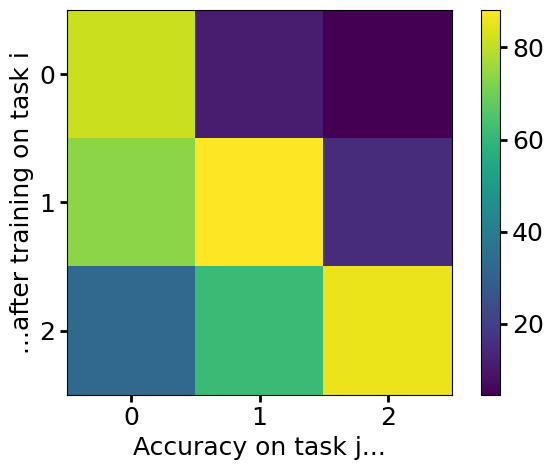

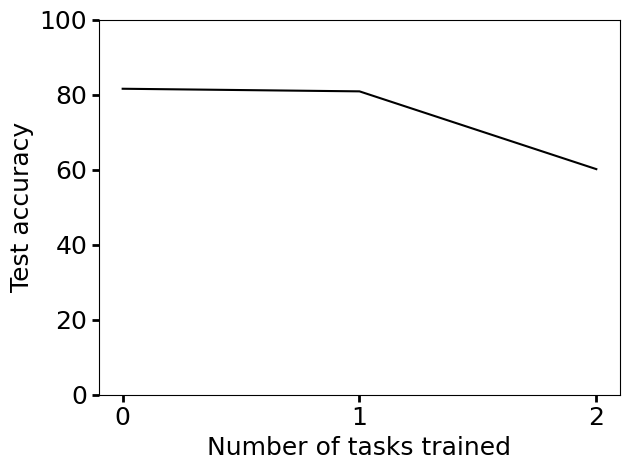

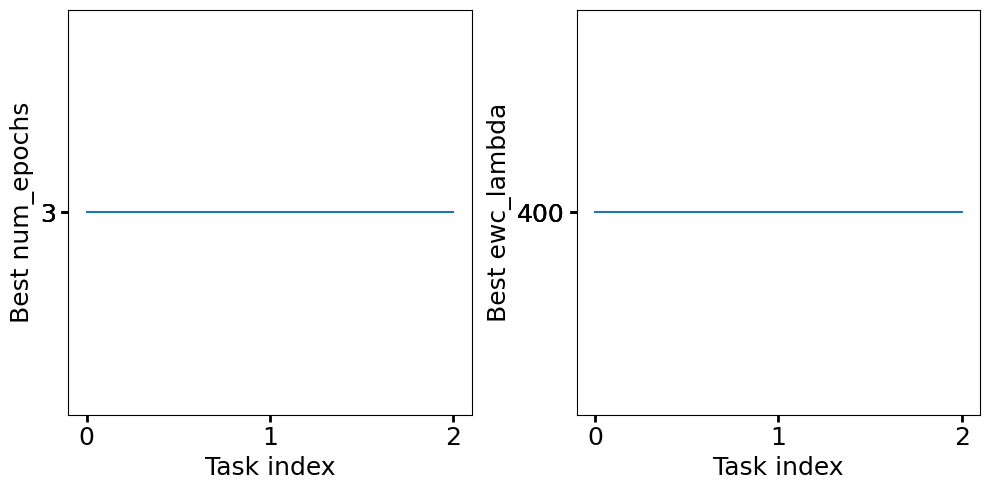

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


KeyError: 'ewc'

## Visualize validation

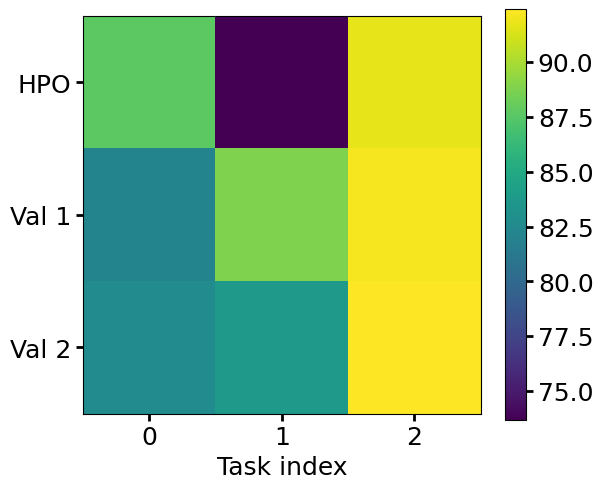

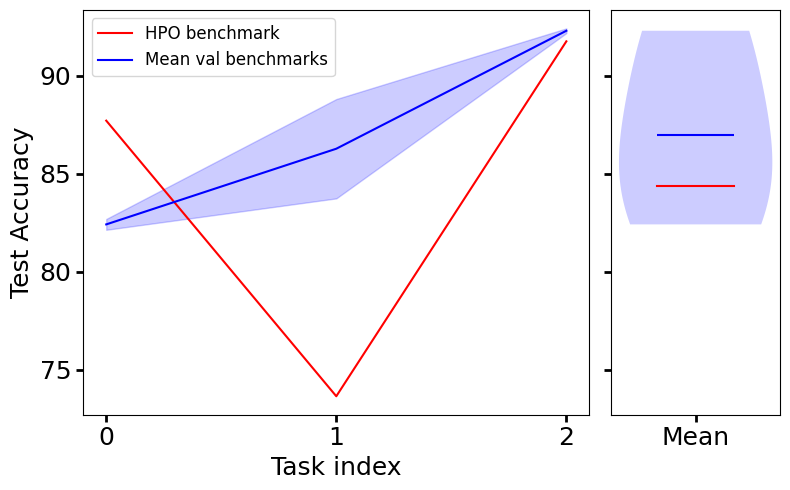

In [ ]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [ ]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)